### Jupyter notebook about retail stocks performance in Brazilian market!

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


### Ativos do varejo do mercado brasileiro

In [2]:
ativos = ['VIIA3','MGLU3', 'LREN3', 'GUAR3', 'CEAB3', 'ARZZ3']

In [3]:
ativos = [i + '.SA' for i in ativos]

In [4]:
inicio = '2022-02-01'
#fim = '2023-08-17'
yesterday =  datetime.date.today() - datetime.timedelta(days=1)
yest= yesterday.strftime('%Y-%m-%d')
yest

'2023-08-28'

In [5]:
df = yf.download(ativos, start = inicio, end = yest)['Adj Close']

[*********************100%***********************]  6 of 6 completed


In [6]:
df.tail()

,ARZZ3.SA,CEAB3.SA,GUAR3.SA,LREN3.SA,MGLU3.SA,VIIA3.SA
Date,,,,,,
2023-08-21,76.529999,5.99,6.54,17.110001,3.05,1.68
2023-08-22,81.190002,6.14,6.78,17.180000,3.04,1.67
2023-08-23,82.860001,6.48,7.13,17.410000,3.06,1.63
2023-08-24,79.910004,6.43,7.13,16.889999,3.02,1.60
2023-08-25,76.440002,5.98,6.70,16.610001,2.92,1.55


#### normalizando os ativos


In [7]:
normalizado = df/df.iloc[0]

<Axes: xlabel='Date'>

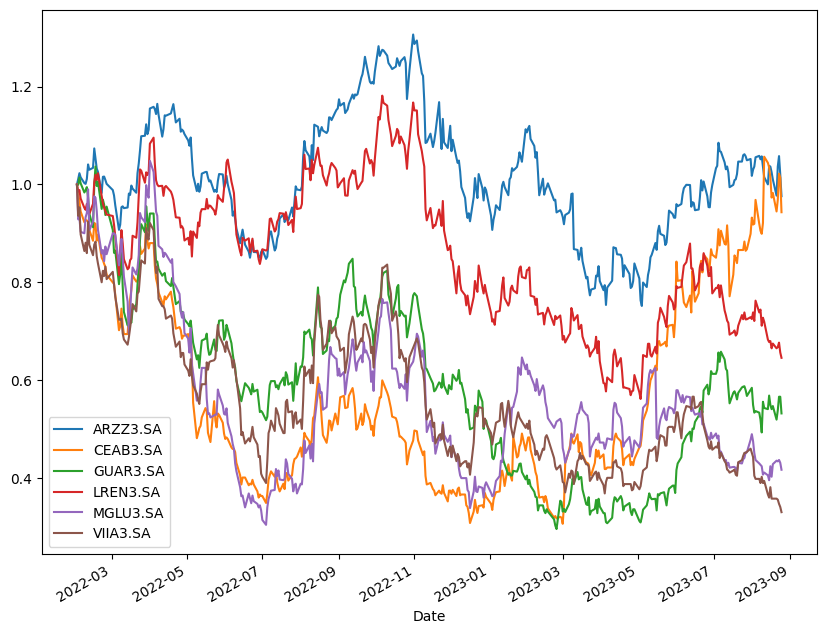

In [8]:
normalizado.plot(figsize = (10,8))

### Preços no dia do aporte

In [9]:
primeiro = df.iloc[0]

In [10]:
primeiro

ARZZ3.SA    78.317413
CEAB3.SA     6.340000
GUAR3.SA    12.600346
LREN3.SA    25.734547
MGLU3.SA     7.010000
VIIA3.SA     4.700000
Name: 2022-02-01 00:00:00, dtype: float64

In [11]:
#qntd=[100,100,100,500,300,1000,4000]
#res_list = []
#for i in range(0, len(primeiro)):
#    res_list.append(primeiro[i] * qntd[i])
    

In [12]:
comprados = 10000/primeiro

In [13]:
comprados

ARZZ3.SA     127.685525
CEAB3.SA    1577.287028
GUAR3.SA     793.629025
LREN3.SA     388.582715
MGLU3.SA    1426.533477
VIIA3.SA    2127.659661
Name: 2022-02-01 00:00:00, dtype: float64

In [14]:
# Número de papéis arredondados
round(comprados, 0)

ARZZ3.SA     128.0
CEAB3.SA    1577.0
GUAR3.SA     794.0
LREN3.SA     389.0
MGLU3.SA    1427.0
VIIA3.SA    2128.0
Name: 2022-02-01 00:00:00, dtype: float64

In [15]:
comprados = round(comprados, 0)

In [16]:
comprados

ARZZ3.SA     128.0
CEAB3.SA    1577.0
GUAR3.SA     794.0
LREN3.SA     389.0
MGLU3.SA    1427.0
VIIA3.SA    2128.0
Name: 2022-02-01 00:00:00, dtype: float64

## 7.4. Construção da carteira e da comparação com o IBOV

Como saber qual era o valor que tínhamos em cada papel, por dia? Basta multiplicar o número de papéis que compramos com os preços diários

In [17]:
PL = df*comprados
#PL=df*qntd

In [18]:
PL.head()

,ARZZ3.SA,CEAB3.SA,GUAR3.SA,LREN3.SA,MGLU3.SA,VIIA3.SA
Date,,,,,,
2022-02-01,10024.628906,9998.180241,10004.674416,10010.738651,10003.270327,10001.599594
2022-02-02,10133.375977,9793.170060,9996.857660,9866.031494,9289.770327,9363.200203
2022-02-03,10255.718750,9651.239820,10145.365410,9895.715775,9318.310299,9533.440041
2022-02-04,10170.451172,9446.229639,10028.122410,9721.326563,9032.909891,8980.159554
2022-02-07,10053.051758,9225.449850,9840.535427,9532.093727,9004.369918,8639.679878


In [19]:
PL.tail()

,ARZZ3.SA,CEAB3.SA,GUAR3.SA,LREN3.SA,MGLU3.SA,VIIA3.SA
Date,,,,,,
2023-08-21,9795.839844,9446.229639,5192.759970,6655.790237,4352.349932,3575.039888
2023-08-22,10392.320312,9682.779789,5383.320167,6683.020119,4338.079946,3553.759909
2023-08-23,10606.080078,10218.960030,5661.220091,6772.489941,4366.619918,3468.639990
2023-08-24,10228.480469,10140.109729,5661.220091,6570.209763,4309.539973,3404.800051
2023-08-25,9784.320312,9430.460030,5319.799849,6461.290237,4166.840109,3298.399899


In [20]:
# Criando uma nova coluna que vai demonstrar o valor total da nossa carteira, por dia
PL['PL Total'] = PL.sum(axis = 1)

In [21]:
#PL.head()
PL.tail()

,ARZZ3.SA,CEAB3.SA,GUAR3.SA,LREN3.SA,MGLU3.SA,VIIA3.SA,PL Total
Date,,,,,,,
2023-08-21,9795.839844,9446.229639,5192.759970,6655.790237,4352.349932,3575.039888,39018.009510
2023-08-22,10392.320312,9682.779789,5383.320167,6683.020119,4338.079946,3553.759909,40033.280241
2023-08-23,10606.080078,10218.960030,5661.220091,6772.489941,4366.619918,3468.639990,41094.010048
2023-08-24,10228.480469,10140.109729,5661.220091,6570.209763,4309.539973,3404.800051,40314.360075
2023-08-25,9784.320312,9430.460030,5319.799849,6461.290237,4166.840109,3298.399899,38461.110436


In [22]:
ibov = yf.download('^BVSP', start = inicio, end = yest)

NameError: name 'fim' is not defined

In [ ]:
ibov.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-01,112143.0,113302.0,112135.0,113147.0,113147.0,11133300
2022-02-02,113228.0,113666.0,111645.0,112161.0,112161.0,11751200
2022-02-03,111897.0,112502.0,111225.0,111696.0,111696.0,11039700
2022-02-04,111696.0,112415.0,110321.0,112245.0,112245.0,0
2022-02-07,112247.0,112517.0,111490.0,111996.0,111996.0,10672800


In [ ]:
ibov.rename(columns = {'Close':'Ibov'}, inplace = True)

In [ ]:
ibov = ibov[['Ibov']]

In [ ]:
ibov

,Ibov
Date,
2022-02-01,113147.0
2022-02-02,112161.0
2022-02-03,111696.0
2022-02-04,112245.0
2022-02-07,111996.0
...,...
2023-08-10,118350.0
2023-08-11,118065.0
2023-08-14,116810.0


Agora vamos juntar os dados das tabelas do IBOV e da nossa carteira

In [ ]:
novo_df = pd.merge(ibov, PL, how = 'inner', on = 'Date')

In [ ]:
novo_df.head()

,Ibov,ARZZ3.SA,CEAB3.SA,GUAR3.SA,LREN3.SA,MGLU3.SA,VIIA3.SA,PL Total
Date,,,,,,,,
2022-02-01,113147.0,10024.628906,9998.180241,10004.673658,10010.739393,10003.270327,10001.599594,60043.092119
2022-02-02,112161.0,10133.376953,9793.170060,9996.858418,9866.032236,9289.770327,9363.200203,58442.408196
2022-02-03,111696.0,10255.718750,9651.239820,10145.364653,9895.715775,9318.310299,9533.440041,58799.789337
2022-02-04,112245.0,10170.451172,9446.229639,10028.123167,9721.326563,9032.909891,8980.159554,57379.199986
2022-02-07,111996.0,10053.051758,9225.449850,9840.534670,9532.092985,9004.369918,8639.679878,56295.179059


<Axes: xlabel='Date'>

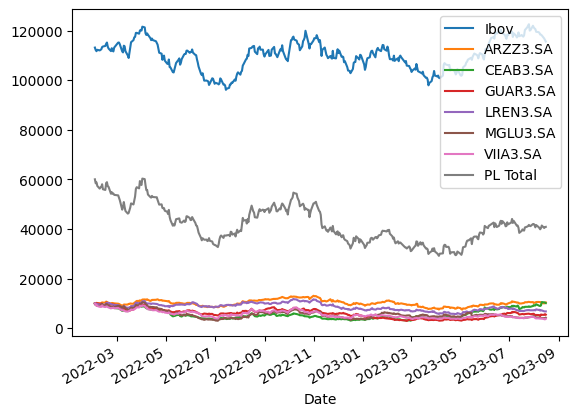

In [ ]:
novo_df.plot()

In [ ]:
novo_normalizado = (novo_df/novo_df.iloc[0])*100

In [ ]:
novo_normalizado

,Ibov,ARZZ3.SA,CEAB3.SA,GUAR3.SA,LREN3.SA,MGLU3.SA,VIIA3.SA,PL Total
Date,,,,,,,,
2022-02-01,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2022-02-02,99.128567,101.084809,97.949525,99.921884,98.554481,92.867333,93.617027,97.334108
2022-02-03,98.717597,102.305221,96.529964,101.406253,98.850998,93.152639,95.319153,97.929316
2022-02-04,99.202807,101.454640,94.479489,100.234386,97.108976,90.299568,89.787233,95.563366
2022-02-07,98.982739,100.283530,92.271290,98.359377,95.218671,90.014262,86.382981,93.757961
...,...,...,...,...,...,...,...,...
2023-08-10,104.598443,103.616805,92.113565,55.554036,72.742676,40.656203,38.936173,67.281928
2023-08-11,104.346558,101.497221,105.678228,54.284231,71.926656,41.084166,39.361704,68.981341
2023-08-14,103.237381,100.016074,104.416399,54.046140,68.273977,40.513550,36.595747,67.319467


<Axes: xlabel='Date'>

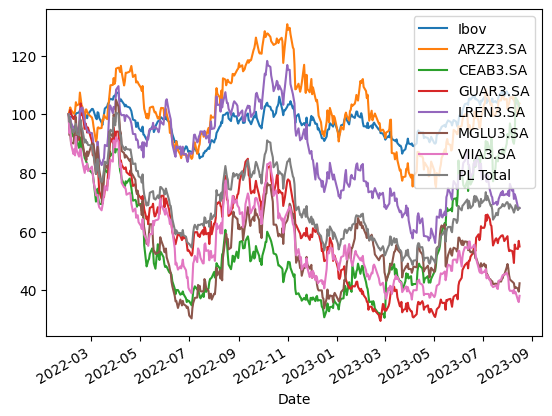

In [ ]:
novo_normalizado.plot()

<Axes: >

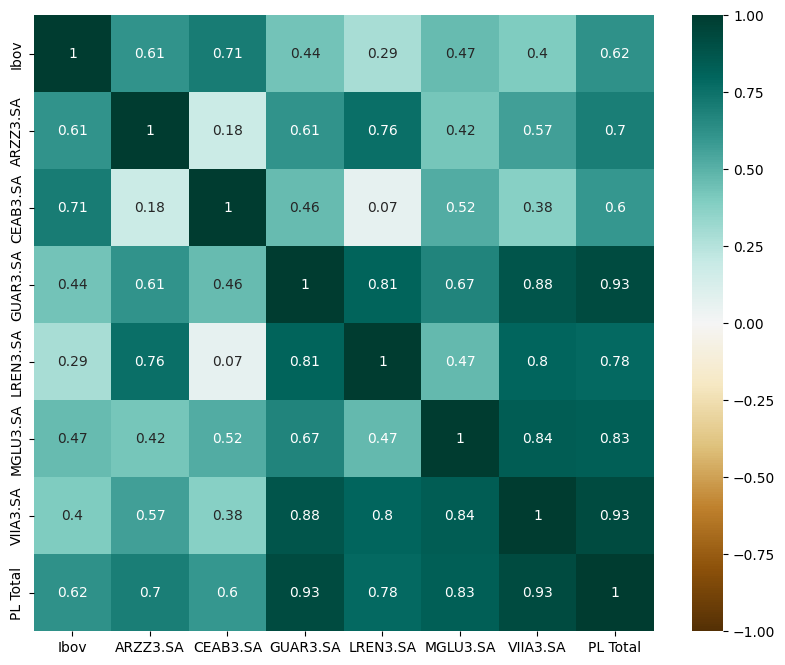

In [ ]:
plt.figure(figsize = (10,8))

sns.heatmap(novo_normalizado.corr(),
           vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')

<Axes: xlabel='Date'>

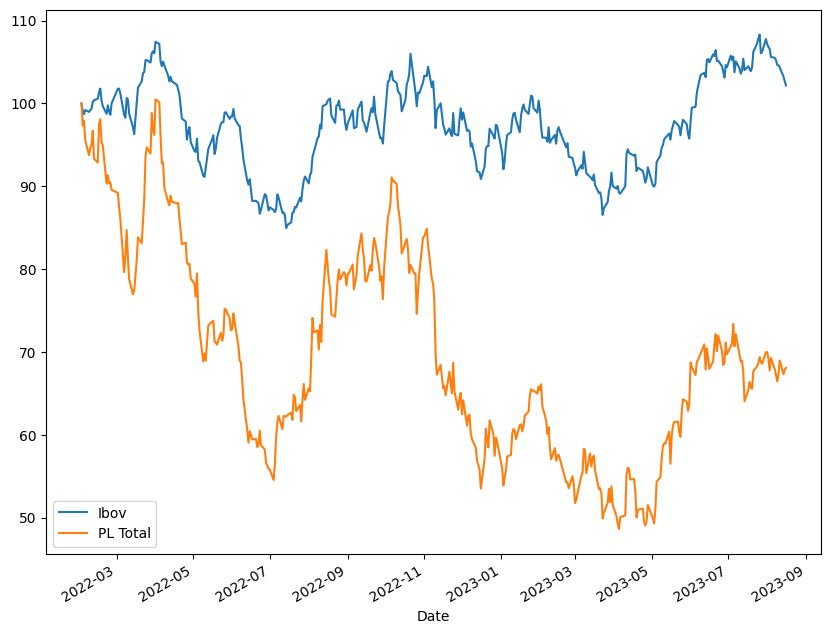

In [ ]:
novo_normalizado[['Ibov','PL Total']].plot(figsize = (10,8))

E se o usuário conseguisse determinar quanto ele investiria em cada ativo?

In [ ]:
#retail ativos
ativos

['VIIA3.SA', 'MGLU3.SA', 'LREN3.SA', 'GUAR3.SA', 'CEAB3.SA', 'ARZZ3.SA']